In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import random
from keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
import os
# some of image reading from drive was inspired from here 
#https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/?completed=/loading-custom-data-deep-learning-python-tensorflow-keras/

location = '/content/drive/My Drive/ICIAR2018_BACH_Challenge/Photos/' 

CATEGORIES = ["Benign", "InSitu","Invasive","Normal"]

# we will see sample from the data on how it look 
for category in CATEGORIES:  # go through "Benign", "InSitu","Invasive","Normal"
    pa = os.path.join(location,category)  # create path 
    for img in os.listdir(pa):  # iteration over each categorie
        img_array = cv2.imread(os.path.join(pa,img),cv2.IMREAD_GRAYSCALE )   # array convertaion    
        # this is the first image with the full resolution
        # we will plot the first one to see the data
        break  
    break  

Using TensorFlow backend.


Before resize (1536, 2048)


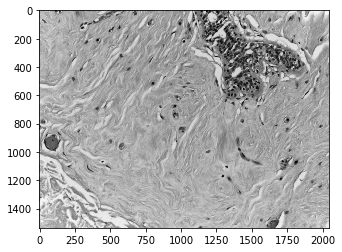

After resize (500, 500)


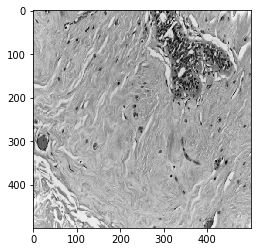

In [0]:
# we now will print image with high resolution and image after resizing 
print('Before resize',img_array.shape)
plt.imshow(img_array,cmap='gray')  
plt.show()

IMG_SIZE = 500
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print('After resize',new_array.shape)

plt.imshow(new_array,cmap='gray')  ##, we will try images with  cmap='gray'
plt.show()


In [0]:
from tqdm import tqdm

# now we will apply that in all of our data 

training_data = []

def create():
    for category in CATEGORIES:  # know we will work in all of the data 
        path = os.path.join(location,category)  # create path
        class_num = CATEGORIES.index(category)  # get the classification  (1 , 2,3,4). 

        for img in tqdm(os.listdir(path)):  # iterate over each image 
        
        # we had error from colab OOM when we tried to work in coloured images with high resolution 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE )  # convert to array  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE) )  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create()



100%|██████████| 100/100 [00:05<00:00, 18.86it/s]




---



In [0]:
# now we will shuffel data 
random.shuffle(training_data)

# we would split features and labels in 2 arrays 

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print((X.shape))

(400, 500, 500, 1)


In [0]:
#split data , we splited the data in this shape as we will make agumentation to the data 
# so we will need both values of X_train & X_train_notscalled

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 

# split data 20 % test , 20 % validation and 60 % train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# this values we would use in augmentaion 
X_train_notscalled =X_train
X_test_notscalled =X_test
X_val_notscalled =X_val

X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

In [0]:
# we are doing categorical to images it's like one hot encoding 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


print(y_train[3])
print(y_val[0])

[0. 0. 1. 0.]
[0. 0. 1. 0.]


### **Image Augmantation **

---



In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
batch_size = 30
train_generator = train_datagen.flow(X_train_notscalled , y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val_notscalled, y_val, batch_size=20)



---



In [0]:
# we will need it as we would use fit-generator 
steps_per_epoch  = len(X_train_notscalled)//batch_size
print(steps_per_epoch)

8


# CNN

In [0]:
#cnn


In [0]:
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPooling2D(pool_size=4))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=4))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=4))
model.add(Dropout(0.3))      
model.add(Flatten())  
#model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))      
model.add(Dense(4, activation='softmax'))
model.summary()


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 500, 500, 16)      80        
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 125, 125, 32)      2080      
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 31, 31, 64)        8256      
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_70 (Dropout)         (None, 7, 7, 64)        

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
##########################################   ModelCheckpoint
from keras.callbacks import ModelCheckpoint  ,EarlyStopping,ReduceLROnPlateau
from keras import optimizers


### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

################################# Do NOT modify the code below this line.
checkpoint_path = "/content/drive/My Drive/Colab Notebooks/callback/training_1cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss', mode='min')


history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=100, callbacks = [mcp_save,earlyStopping],
                              validation_data=val_generator)  

'''
history = model.fit(X_train, y_train,  epochs = epochs,validation_data=(X_val, y_val),batch_size=20, callbacks = [mcp_save,earlyStopping], verbose=1)




#history = model.fit(train_generator,  epochs = epochs,validation_data= val_generator ,validation_steps=50, callbacks = [earlyStopping, mcp_save], verbose=1)  # pass callback to training

'''


Epoch 1/100
8/8 [==============================] - 7s 837ms/step - loss: 1.4000 - acc: 0.2292 - val_loss: 1.3840 - val_acc: 0.3125
Epoch 2/100
8/8 [==============================] - 0s 51ms/step - loss: 1.3877 - acc: 0.2875 - val_loss: 1.3958 - val_acc: 0.1750
Epoch 3/100
8/8 [==============================] - 4s 515ms/step - loss: 1.3933 - acc: 0.2458 - val_loss: 1.3920 - val_acc: 0.1750
Epoch 4/100
8/8 [==============================] - 4s 517ms/step - loss: 1.3830 - acc: 0.3208 - val_loss: 1.3821 - val_acc: 0.3125
Epoch 5/100
8/8 [==============================] - 4s 529ms/step - loss: 1.3902 - acc: 0.1958 - val_loss: 1.3901 - val_acc: 0.1750
Epoch 6/100
8/8 [==============================] - 4s 526ms/step - loss: 1.3828 - acc: 0.2792 - val_loss: 1.3970 - val_acc: 0.1750
Epoch 7/100
8/8 [==============================] - 4s 522ms/step - loss: 1.3874 - acc: 0.2625 - val_loss: 1.3917 - val_acc: 0.1875
Epoch 8/100
8/8 [==============================] - 4s 512ms/step - loss: 1.3824 - ac

'\nhistory = model.fit(X_train, y_train,  epochs = epochs,validation_data=(X_val, y_val),batch_size=20, callbacks = [mcp_save,earlyStopping], verbose=1)\n\n\n\n\n#history = model.fit(train_generator,  epochs = epochs,validation_data= val_generator ,validation_steps=50, callbacks = [earlyStopping, mcp_save], verbose=1)  # pass callback to training\n\n'

In [0]:
# get index of predicted dog breed for each image in test set
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in X_test]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_test, axis=1)) /len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 41.2500%


In [0]:
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in X_train]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_train, axis=1)) /len(predictions)
print('Train accuracy: %.4f%%' % test_accuracy)

Train accuracy: 55.8333%




---



# output graphs 

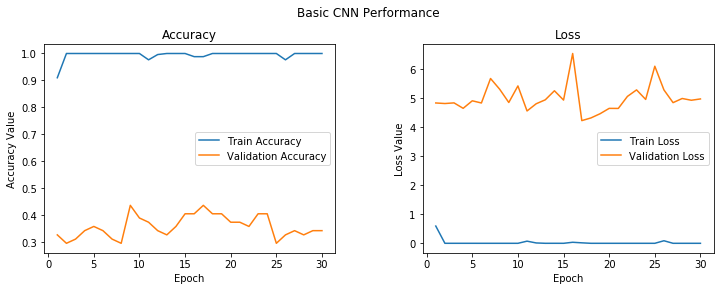

In [0]:
##improve cnn and evaluate 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


#### thiis is in 1000/*1000 with added repeted cnn with max pooling gray 

In [0]:
score = model.evaluate(X_test, y_test) 
score

80/80 [==============================] - 2s 23ms/step


[12.491524124145508, 0.225]

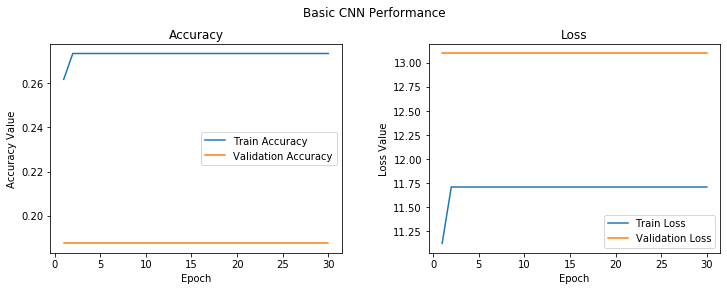

In [0]:
##improve cnn and evaluate 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## output in 1500 *1500 abd dense 100 with 7 million parameter  gray 
### loklike overfitting 

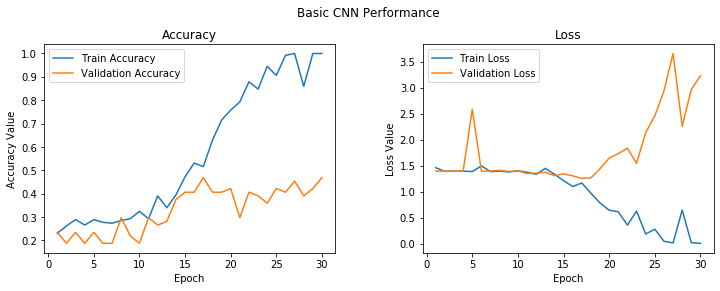

In [0]:
##improve cnn and evaluate 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## output in 1500 *1500 abd 1 million parameter adding repeated cnn with max pooling     gray 

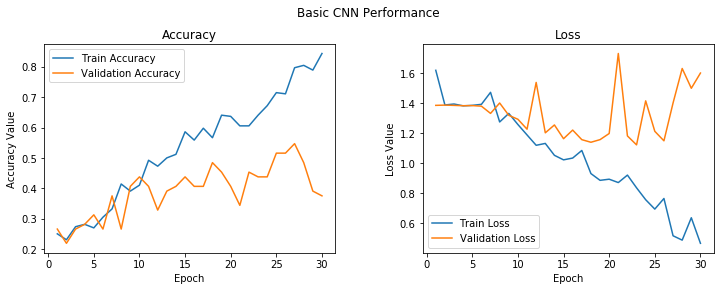

In [0]:
##improve cnn and evaluate 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## coloured imaged 800 *800 *3 in 30 epoch on 380,000 parameter 
# acc of 43 % 

# i rerun it with now change accuracy is 40 %



---



# graph of current 

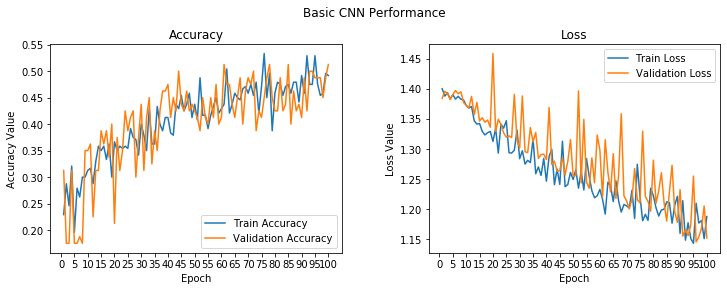

In [0]:
##improve cnn and evaluate 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
z = 101

epoch_list = list(range(1,z))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, z, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, z, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#reducing n epoch to 30 
## coloured imaged 800 *800 *3 in 30 epoch on 380,000 parameter 
##grapl is sperated




---

